In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load and prepare data

In [2]:
# Load data
iris = load_iris()
X = iris.data[:, :2] # will use only the first 2 features
y = iris.target
X.shape, iris.target_names

((150, 2), array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [3]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=0)

In [4]:
X_train.shape, X_test.shape

((100, 2), (50, 2))

In [5]:
y_train.shape, y_test.shape

((100,), (50,))

# Train KNN

In [6]:
# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.72

# Check performance over different k values

In [7]:
def plot_decision_boundaries(X, y, clf, k, feature_names, resolution=0.02):
    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    
    # Plot class sample
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
    
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('KNN (k={})'.format(k))

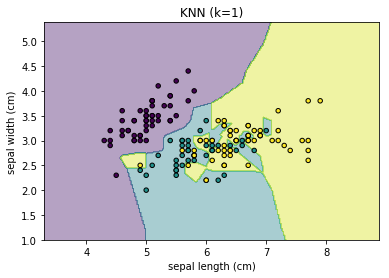

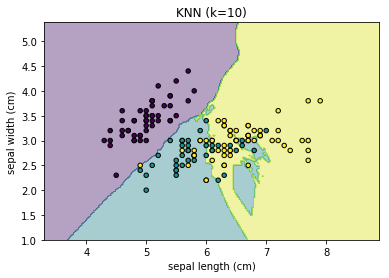

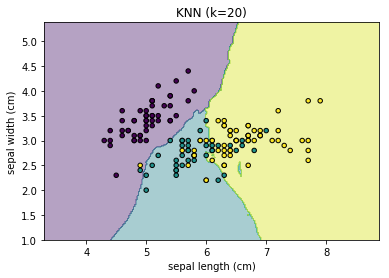

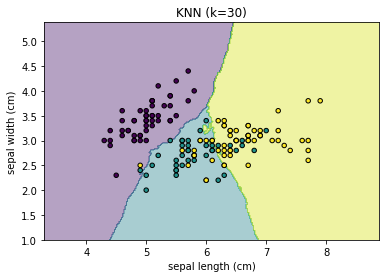

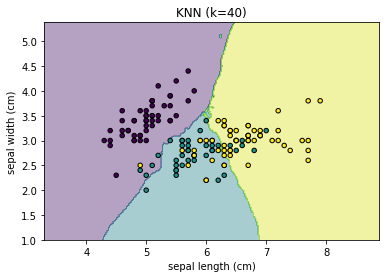

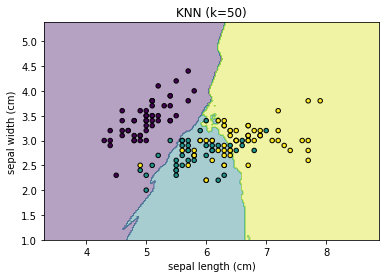

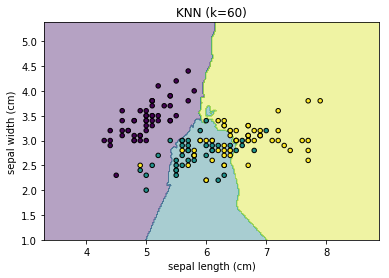

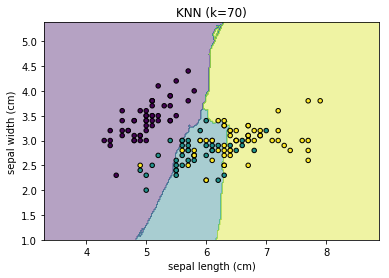

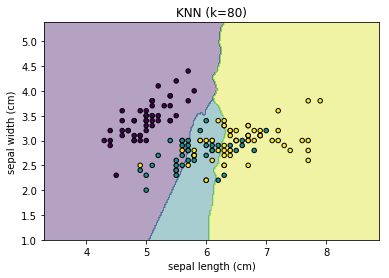

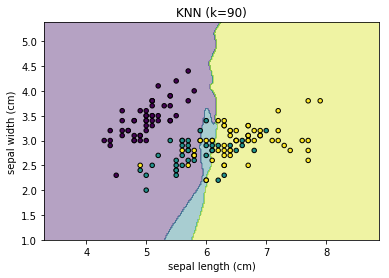

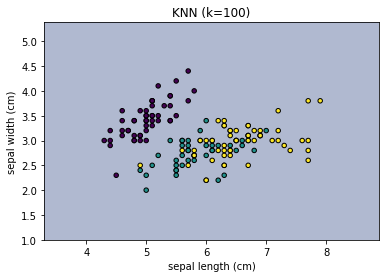

In [8]:
neighbors, scores, scores_train = [], [], []

for k in range(1, 101):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)
    score_train = knn.score(X_train, y_train)
    scores_train.append(score_train)
    if k == 1 or k % 10 == 0:
        plot_decision_boundaries(X, y, knn, k, iris.feature_names[:2])
        plt.show()

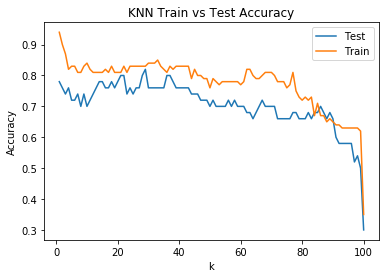

In [9]:
ax = plt.plot(neighbors, scores, label='Test')
plt.plot(neighbors, scores_train, label='Train')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Train vs Test Accuracy')
plt.legend()
plt.show()

# Confusion Matrix

In [10]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[16  0  0]
 [ 1 13  5]
 [ 0  6  9]]


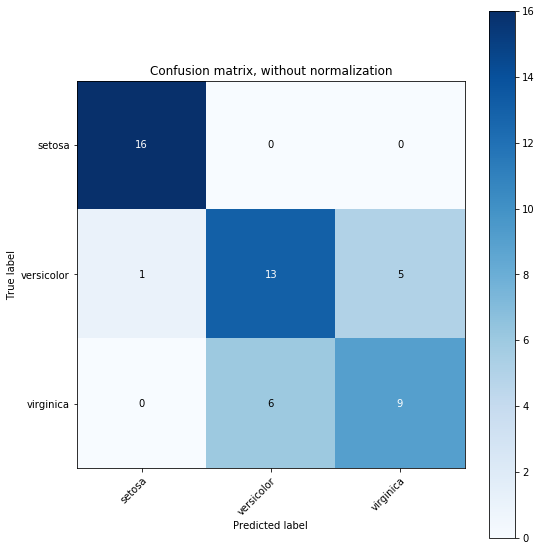

In [11]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
plot_confusion_matrix(y_test, y_pred, iris.target_names)